In [110]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.renderefd{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

# ※ ①naver open API를 활용하여 네이버지식인 "전주여행"과 "경주여행"을 각각 500건씩 검색(re ? )후 백업 ->  ②품사태깅 백업 -> ③명사만 추출 -> ④빈도분석(DataFrame) 후 백업-> ⑤빈도 시각화(워드클라우드, Text) ->⑥ Word2Vec

# 1. 네이버 open API를 활용하여 검색 추출
- 검색어, no, title, link, description, title + ' ' + description(total_text)

In [111]:
# pip install python-dotenv (환경변수를 쓰기 위한 라이브러리)
# pip install python-decouple (주피터 환경에서는 안 될 수도 있음)
import os
os.getcwd() # 현재 작업디렉토리

'C:\\ai_x\\source\\07_자연어처리'

In [112]:
%ls .env

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 3664-591E

 C:\ai_x\source\07_자연어처리 디렉터리

2025-06-18  오후 05:48                56 .env
               1개 파일                  56 바이트
               0개 디렉터리  130,491,416,576 바이트 남음


In [113]:
from dotenv import load_dotenv
load_dotenv()

# print(os.getenv('Client_ID'))
# print(os.getenv('Client_Secret'))

True

In [114]:
from decouple import config
# print(config('Client_ID'))
# print(config('Client_Secret'))

In [115]:
# 네이버 개발자 센터 document에 있는 내용 그냥 그대로 가져와 봄
import os
import sys
import urllib.request
client_id = os.getenv('Client_ID')
client_secret = os.getenv('Client_Secret')
encText = urllib.parse.quote("경주 여행")
url = "https://openapi.naver.com/v1/search/blog?query=" + encText # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8')[:500])
else:
    print("Error Code:" + rescode)

{
	"lastBuildDate":"Thu, 19 Jun 2025 12:58:42 +0900",
	"total":931143,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"<b>경주 여행<\/b>코스 루지월드 해방감을 느꼈어요",
			"link":"https:\/\/blog.naver.com\/sangil00\/223903211939",
			"description":"오랜만에 활기차고 건강하게 하루를 보낼 수 있었고요. 날씨 좋은 계절에 경주를 방문하신다면 루지월드를 꼭 <b>경주 여행<\/b>코스에 넣어보시길 바라요. 정말 후회 없는 경험이 될 거예요. #<b>경주여행<\/b>코스 #루지월드",
			"bloggername":"길을 찾는 즐거움_거칠부",
			"bloggerlink":"blog.naver.com\/sangil00",
			"postdate":"20250618"
		},
		{
			"title":"당일치기 <


In [116]:
# 패키지 import
import requests
import time
import os
import json # response 텍스트를 json 딕셔너리로
from html import unescape # description에 있는 &lt;(특수문자)을 <으로 변경, &gt;-> >
import pandas as pd
import re

In [117]:
query = "경주 여행"
start = 1
url = f"https://openapi.naver.com/v1/search/kin.json?query={query}&display=100&start={start}"
headers = {"X-Naver-Client-Id":client_id,
           "X-Naver-Client-Secret":client_secret}
response = requests.get(url, headers=headers)
items = json.loads(response.text)['items']
print(len(items))
print(items[51],items[58])

100
{'title': '<b>경주 여행</b> 코스 어디가★', 'link': 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90111&docId=277365452&qb=6rK97KO8IOyXrO2WiQ==&enc=utf8', 'description': '가족들이랑 <b>경주여행</b>을 가려고 하는데 !! <b>경주 여행</b> 코스를 어떻게 해야할지 모르겟네요!! <b>경주 여행</b> 코스 어디가 좋을까요? 사실 중학교때 가보고 안가봤어요 <b>경주 여행</b>코스 가장 핫플레이스만 가보고 싶어요!! 혹시 <b>경주 여행</b>코스 다들... '} {'title': '<b>경주 여행</b>!! 황리단길 맛집추천', 'link': 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=901&docId=451834956&qb=6rK97KO8IOyXrO2WiQ==&enc=utf8', 'description': '이번주에 <b>경주여행</b> 가는데 황리단길 근처로 맛집 많이 추천해주세요 ~ 뚜벅이라 거리멀면 힘들어요 ㅠㅠ <b>경주 여행</b>을 위한 황리단길 맛집 추천과 황리단 맛집과 경주 맛집은 매일 많은 분들이 줄을 오랫동안 서서 기다려 먹는 곳과 배달... '}


In [236]:
item = items[58]
title = item['title']
link = item['link']
description = item['description']
print(title, link, description, sep='\n')

<b>경주 여행</b>!! 황리단길 맛집추천
https://kin.naver.com/qna/detail.naver?d1id=9&dirId=901&docId=451834956&qb=6rK97KO8IOyXrO2WiQ==&enc=utf8
이번주에 <b>경주여행</b> 가는데 황리단길 근처로 맛집 많이 추천해주세요 ~ 뚜벅이라 거리멀면 힘들어요 ㅠㅠ <b>경주 여행</b>을 위한 황리단길 맛집 추천과 황리단 맛집과 경주 맛집은 매일 많은 분들이 줄을 오랫동안 서서 기다려 먹는 곳과 배달... 


In [237]:
# 위의 title의 <b>태그 없애기, description의 <b>태그 없애고 html의 특수문자 없애기
item = items[58]
title = item['title'].replace('<b>', ' ').replace('</b>', ' ')
link = item['link']
description = item['description'].replace('<b>', ' ').replace('</b>', ' ')
description = unescape(description) # html 특수문자 처리(&lt; -> <로 대체)
print(title, link, description, sep='\n')

 경주 여행 !! 황리단길 맛집추천
https://kin.naver.com/qna/detail.naver?d1id=9&dirId=901&docId=451834956&qb=6rK97KO8IOyXrO2WiQ==&enc=utf8
이번주에  경주여행  가는데 황리단길 근처로 맛집 많이 추천해주세요 ~ 뚜벅이라 거리멀면 힘들어요 ㅠㅠ  경주 여행 을 위한 황리단길 맛집 추천과 황리단 맛집과 경주 맛집은 매일 많은 분들이 줄을 오랫동안 서서 기다려 먹는 곳과 배달... 


In [238]:
import re
description = "#추억여행 ####ktx 타고@짱@ ㅎㅎㅎ ㅠㅠ ㅋㅋ"

# 정규표현식: 알파벳, 숫자, 한글만 남기고 나머지는 제거
description = re.sub(r'[^a-zA-Z0-9가-힣]', ' ', description)
description = re.sub('\s+', ' ', description)
print(description)

 추억여행 ktx 타고 짱 


In [239]:
# 네이버 API 계정 정보
from dotenv import load_dotenv
import os
load_dotenv()
client_id = os.getenv('Client_ID')
client_secret = os.getenv('Client_Secret')
queries = ['전주 여행', '경주 여행']
max_start = 5

In [122]:
# 방법1
def get_search_element_save(query, start):
    headers = {'X-Naver-Client-Id':client_id,
           'X-Naver-Client-Secret':client_secret}
    url = f'https://openapi.naver.com/v1/search/kin.json?query={query}&display=100&start={start}'
    response = requests.get(url, headers=headers)
    items = json.loads(response.text)['items']
    for i, item in enumerate(items):
        title = item['title'].replace('<b>', ' ').replace('</b>', ' ')
        link = item['link']
        description = item['description'].replace('<b>', ' ').replace('</b>', ' ')
#         print('수정전 :', description)
        description = unescape(description) # html 특수문자 처리(&lt; -> <로 대체)
        description = re.sub(r'[^a-zA-Z0-9가-힣]', ' ', description)
        description = re.sub('\s+', ' ', description)
#         print('수정후 :', description)
        # print(query, (start*100+i+1), title, link, description, title+' ' +description)
        with open(file_name, 'a', encoding='utf-8') as file:
            file.write('{}\t{}\t{}\t{}\t{}\t{}\n'.format(query, 
                                                         (start-1)*100+i+1,
                                                         title,
                                                         link,
                                                         description, 
                                                         title + ' ' +description))

In [123]:
# 데이터를 저장할 파일 생성 (naver_kin.txt)하고 title 저장(header저장)
file_name = 'data/naver_kin.csv'
with open(file_name, 'w', encoding='utf-8') as file:
    file.write('{}\t{}\t{}\t{}\t{}\t{}\n'.format('query', 
                            'no','title','link', 'description', 'total_text'))

In [124]:
for query in queries:
    for start in range(1, max_start+1):
        print(start, query, '읽는 중')
        get_search_element_save(query, start)
        time.sleep(0.5)

1 전주 여행 읽는 중
2 전주 여행 읽는 중
3 전주 여행 읽는 중
4 전주 여행 읽는 중
5 전주 여행 읽는 중
1 경주 여행 읽는 중
2 경주 여행 읽는 중
3 경주 여행 읽는 중
4 경주 여행 읽는 중
5 경주 여행 읽는 중


In [125]:
# 방법2 (수업시간 내용과 동일)
def get_search_element_return(query, start):
    headers = {'X-Naver-Client-Id':client_id,
           'X-Naver-Client-Secret':client_secret}
    url = f'https://openapi.naver.com/v1/search/kin.json?query={query}&display=100&start={start}'
    response = requests.get(url, headers=headers)
    items = json.loads(response.text)['items']
    result = []
    for i, item in enumerate(items):
        title = item['title'].replace('<b>', ' ').replace('</b>', ' ')
        link = item['link']
        description = item['description'].replace('<b>', ' ').replace('</b>', ' ')
#         print('수정전 :', description)
        description = unescape(description) # html 특수문자 처리(&lt; -> <로 대체)
        description = re.sub(r'[^a-zA-Z0-9가-힣]', ' ', description)
        description = re.sub('\s+', ' ', description)
#         print('수정후 :', description)
        # print(query, (start*100+i+1), title, link, description, title+' ' +description)
        result.append({'query':query,
                      'no':(start-1)*100+i+1,
                      'title':title,
                      'link':link,
                      'description':description,
                      'total_text':title+ ' ' + description})
    return result

In [127]:
result_total = []
for query in queries:
    for start in range(1, max_start+1):
        print(start, query, '읽는 중')
        result_total.extend(get_search_element_return(query, start))
        time.sleep(0.5)
df = pd.DataFrame(result_total)
df.to_csv('data/naver_kin.csv', index=False, sep='\t')

1 전주 여행 읽는 중
2 전주 여행 읽는 중
3 전주 여행 읽는 중
4 전주 여행 읽는 중
5 전주 여행 읽는 중
1 경주 여행 읽는 중
2 경주 여행 읽는 중
3 경주 여행 읽는 중
4 경주 여행 읽는 중
5 경주 여행 읽는 중


# 2. 품사태깅 백업

In [128]:
import pandas as pd
df = pd.read_csv('data/naver_kin.csv', sep='\t')
df.head(2)

,query,no,title,link,description,total_text
0,전주 여행,1,전주 가볼만한곳 추천 받아요,https://kin.naver.com/qna/detail.naver?d1id=9&...,추억의 7080 다양한체험 7080감성 추억여행 테마박물관 유익한시간 2 전북 전...,전주 가볼만한곳 추천 받아요 추억의 7080 다양한체험 7080감성 추억여행 ...
1,전주 여행,2,전주여행 갈려고하는데요!,https://kin.naver.com/qna/detail.naver?d1id=9&...,전주여행 을 갈려고하는데요 아는사람과 갈려고하는데 호텔은 좋은가격에 정했고 음 2...,전주여행 갈려고하는데요! 전주여행 을 갈려고하는데요 아는사람과 갈려고하는데 호텔...


In [129]:
df_list = df[['query','no','total_text']].values.tolist()
df_list[::500]

[['전주 여행',
  1,
  ' 전주  가볼만한곳 추천 받아요  추억의 7080 다양한체험 7080감성 추억여행 테마박물관 유익한시간 2 전북 전북투어패스 통합이용권 전북핫플 여러여행지 다양한체험 카페이용추가 전주여행 필수 편안하고 즐거운 날이 되시길 바라겠습니다 감사합니다 '],
 ['경주 여행',
  1,
  '추석에  경주 여행  추석에 경주 여행 가는거 어떻게 생각하시나요 서울에서 버스를 타고 갈 경우 버스가 버스전용 차선에서 운행하나요 질문하신 추석 경주여행 관련 답변 드리도록 하겠습니다 첨성대 석굴암 불국사 등 유적지는 연중무휴로 ']]

In [130]:
from konlpy.tag import Komoran, Kkma, Hannanum, Okt
from mecab import MeCab
analyzer = MeCab()
stopwords = ['전주','경주','여행']
select_pos = ['NNG', 'NNP'] 

In [131]:
postagged_lst = []
for i, row in enumerate(df_list):
    query = row[0]
    no = row[1]
    text = row[2]
    text_pos = analyzer.pos(text)
    # analyzer가 MeCab이 아닐 경우 시간이 좀 걸려서 250개마다 로그 출력
#     if i%250==0:
#         print("{}의 {}번째 품사태깅 결과 {}개 저장중".format(query, 
#                                                 no, 
#                                                 len(text_pos), end='\n\n'))
    for token, pos in text_pos:
        # if token not in stopwords and pos in select_pos: 라고 하면 명사만 추출
        if token not in stopwords and len(token)>1: # 모든 품사를 우선 다 넣고 나중에 빼려면
            postagged_lst.append({'query':query,
                                 'no':no,
                                 'token':token,
                                 'pos':pos})
df_postagged = pd.DataFrame(postagged_lst)
df_postagged

,query,no,token,pos
0,전주 여행,1,추천,NNG
1,전주 여행,1,아요,EF
2,전주 여행,1,추억,NNG
3,전주 여행,1,7080,SN
4,전주 여행,1,다양,NNG
...,...,...,...,...
24208,경주 여행,500,참고,NNG
24209,경주 여행,500,쭈니,NNP
24210,경주 여행,500,아빠,NNG
24211,경주 여행,500,블로그,NNG


In [132]:
df_postagged.to_csv('data/naver_kin_pos.csv', index=False, sep='\t')

# 3. 명사만 추출 

In [133]:
df_postagged = pd.read_csv('data/naver_kin_pos.csv', sep='\t')

In [134]:
df_nouns = df_postagged.loc[df_postagged['pos'].isin(['NNP', 'NNG']),
                            ['query', 'token','pos']]
df_nouns.head()

,query,token,pos
0,전주 여행,추천,NNG
2,전주 여행,추억,NNG
4,전주 여행,다양,NNG
5,전주 여행,체험,NNG
7,전주 여행,감성,NNG


In [135]:
df_nouns.to_csv('data/naver_kin_pos_nouns.csv', index=False, sep='\t')

# 4.빈도분석(DataFrame) 후 백업

In [136]:
df_nouns = pd.read_csv('data/naver_kin_pos_nouns.csv', sep='\t')
df_nouns.shape

(14101, 3)

In [137]:
df_nouns.iloc[::5000]

,query,token,pos
0,전주 여행,추천,NNG
5000,전주 여행,코스,NNG
10000,경주 여행,역사,NNG


In [138]:
df_nouns.groupby(['query','token'], as_index=False)['pos'].count()

,query,token,pos
0,경주 여행,가격,10
1,경주 여행,가능,24
2,경주 여행,가본적,5
3,경주 여행,가성,5
4,경주 여행,가시,5
...,...,...,...
879,전주 여행,환급,5
880,전주 여행,회관,5
881,전주 여행,휴가,5
882,전주 여행,휴무,5


In [139]:
df_token_grp = df_nouns.groupby('query')['token'].value_counts()
df_token_grp

query  token
경주 여행  코스       446
       추천       401
       계획       154
       숙소       139
       맛집       120
               ... 
전주 여행  카페이        1
       통합         1
       패스         1
       편안         1
       필수         1
Name: token, Length: 884, dtype: int64

In [140]:
df_token_grp = df_token_grp.reset_index(name='token_count')
df_token_grp.head()

,query,token,token_count
0,경주 여행,코스,446
1,경주 여행,추천,401
2,경주 여행,계획,154
3,경주 여행,숙소,139
4,경주 여행,맛집,120


In [141]:
# 전주 여행과 경우 여행 여행 빈도 추출
import numpy as np
a = pd.DataFrame([['단어1', 90],
                 ['단어2',80]], columns=['단어','경주빈도'])
b = pd.DataFrame([['단어1', 99],
                 ['단어3',81]], columns=['단어','전주빈도'])
display(a)
display(b)
ab = pd.merge(a, b, 
         how='outer', # inner(공통), left, right, outer
         on='단어')   # 두 프레임을 어떤 열 기준으로 합칠지 지정
#pd.concat([a, b], axis=1)
ab.fillna(0, inplace=True)
ab['경주빈도'] = ab['경주빈도'].astype(np.int16)
ab['전주빈도'] = ab['전주빈도'].astype('int')
ab.info()

,단어,경주빈도
0,단어1,90
1,단어2,80


,단어,전주빈도
0,단어1,99
1,단어3,81


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   단어      3 non-null      object
 1   경주빈도    3 non-null      int16 
 2   전주빈도    3 non-null      int32 
dtypes: int16(1), int32(1), object(1)
memory usage: 66.0+ bytes


In [142]:
df_gj = df_token_grp.loc[df_token_grp['query']=='경주 여행', ['token','token_count']]
df_jj = df_token_grp.loc[df_token_grp['query']=='전주 여행', ['token','token_count']]
df_gj.shape, df_jj.shape

((461, 2), (423, 2))

In [143]:
df_gj.head()

,token,token_count
0,코스,446
1,추천,401
2,계획,154
3,숙소,139
4,맛집,120


In [144]:
df_jj.head()

,token,token_count
461,코스,481
462,여수,349
463,주달,304
464,추천,301
465,맛집,287


In [145]:
df_mrg = pd.merge(df_gj, df_jj, how='outer', on='token')
print(df_mrg.shape)
df_mrg

(713, 3)


,token,token_count_x,token_count_y
0,코스,446.0,481.0
1,추천,401.0,301.0
2,계획,154.0,61.0
3,숙소,139.0,60.0
4,맛집,120.0,287.0
...,...,...,...
708,유익,NaN,1.0
709,찜질방,NaN,1.0
710,카페이,NaN,1.0
711,통합,NaN,1.0


In [146]:
df_mrg.columns = ['token','경주빈도','전주빈도']
df_mrg.fillna(0, inplace=True)
df_mrg['경주빈도'] = df_mrg['경주빈도'].astype('int')
df_mrg['전주빈도'] = df_mrg['전주빈도'].astype(np.int64) # 'int64'
df_mrg

,token,경주빈도,전주빈도
0,코스,446,481
1,추천,401,301
2,계획,154,61
3,숙소,139,60
4,맛집,120,287
...,...,...,...
708,유익,0,1
709,찜질방,0,1
710,카페이,0,1
711,통합,0,1


In [147]:
df_mrg['빈도합'] = df_mrg['경주빈도'] + df_mrg['전주빈도']
df_mrg['전주비율'] = df_mrg['전주빈도'] / df_mrg['빈도합']
df_mrg['경주비율'] = df_mrg['경주빈도'] / df_mrg['빈도합']
df_mrg.head(10)

,token,경주빈도,전주빈도,빈도합,전주비율,경주비율
0,코스,446,481,927,0.518878,0.481122
1,추천,401,301,702,0.428775,0.571225
2,계획,154,61,215,0.283721,0.716279
3,숙소,139,60,199,0.301508,0.698492
4,맛집,120,287,407,0.705160,0.294840
5,일정,118,80,198,0.404040,0.595960
6,질문,114,78,192,0.406250,0.593750
7,답변,106,55,161,0.341615,0.658385
8,부탁,105,75,180,0.416667,0.583333
9,가족,95,20,115,0.173913,0.826087


In [148]:
df_mrg_srt = df_mrg.sort_values(by=['빈도합'], ascending=False)
df_mrg_srt

,token,경주빈도,전주빈도,빈도합,전주비율,경주비율
0,코스,446,481,927,0.518878,0.481122
1,추천,401,301,702,0.428775,0.571225
4,맛집,120,287,407,0.705160,0.294840
461,여수,0,349,349,1.000000,0.000000
462,주달,0,304,304,1.000000,0.000000
...,...,...,...,...,...,...
459,전용,1,0,1,0.000000,1.000000
455,권역,1,0,1,0.000000,1.000000
456,연중무휴,1,0,1,0.000000,1.000000
457,운행,1,0,1,0.000000,1.000000


In [149]:
df_mrg_srt['전주비율'] = df_mrg_srt['전주비율'].apply(lambda x : "{:.2%}".format(x))
df_mrg_srt['경주비율'] = df_mrg_srt['경주비율'].apply(lambda x : "{:.2%}".format(x))
df_mrg_srt

,token,경주빈도,전주빈도,빈도합,전주비율,경주비율
0,코스,446,481,927,51.89%,48.11%
1,추천,401,301,702,42.88%,57.12%
4,맛집,120,287,407,70.52%,29.48%
461,여수,0,349,349,100.00%,0.00%
462,주달,0,304,304,100.00%,0.00%
...,...,...,...,...,...,...
459,전용,1,0,1,0.00%,100.00%
455,권역,1,0,1,0.00%,100.00%
456,연중무휴,1,0,1,0.00%,100.00%
457,운행,1,0,1,0.00%,100.00%


In [150]:
df_mrg_srt.reset_index(drop=True, inplace=True)
df_mrg_srt

,token,경주빈도,전주빈도,빈도합,전주비율,경주비율
0,코스,446,481,927,51.89%,48.11%
1,추천,401,301,702,42.88%,57.12%
2,맛집,120,287,407,70.52%,29.48%
3,여수,0,349,349,100.00%,0.00%
4,주달,0,304,304,100.00%,0.00%
...,...,...,...,...,...,...
708,전용,1,0,1,0.00%,100.00%
709,권역,1,0,1,0.00%,100.00%
710,연중무휴,1,0,1,0.00%,100.00%
711,운행,1,0,1,0.00%,100.00%


In [151]:
df_mrg_srt.to_csv('data/naver_kin_pos_nouns_count.txt', sep='\t')

# 5. 빈도 시각화(워드클라우드, Text)

In [152]:
df_nouns = pd.read_csv('data/naver_kin_pos_nouns.csv', sep='\t')
print(df_nouns.shape)
df_nouns.iloc[::3000]

(14101, 3)


,query,token,pos
0,전주 여행,추천,NNG
3000,전주 여행,시간,NNG
6000,전주 여행,실내,NNG
9000,경주 여행,혼자,NNG
12000,경주 여행,코스,NNG


In [153]:
df_nouns['pos'].unique()

array(['NNG', 'NNP'], dtype=object)

In [154]:
df_gj_noun = df_nouns.loc[df_nouns['query']=='경주 여행','token'].to_list()
df_jj_noun = df_nouns.loc[df_nouns['query']=='전주 여행','token'].to_list()
print(df_gj_noun[:5])
print(df_jj_noun[:5])
gj = ' '.join(df_gj_noun)
jj = ' '.join(df_jj_noun)
print(gj[:10])
print(jj[:10])

['추석', '추석', '생각', '서울', '버스']
['추천', '추억', '다양', '체험', '감성']
추석 추석 생각 서
추천 추억 다양 체


In [155]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
color_map = "Blues"
font_path = 'data/NanumPenScript-Regular.ttf'

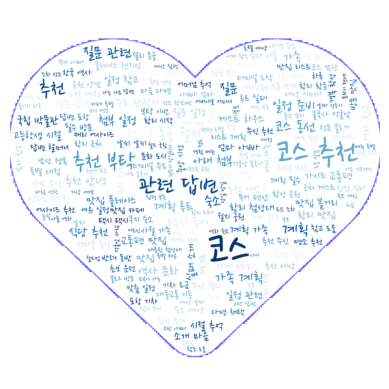

In [156]:
import numpy as np
from PIL import Image
mask = np.array(Image.open('data/heart.jpg'))
불용어 = set(['여행'])
wordcloud = WordCloud(
    background_color='white',
    colormap=color_map,
    collocations=True, # 특정단어가 자주 같이 나오면 같이 뿌려 ex황리단같은거는 같이
    max_words=200,
    max_font_size=200,
    scale=2, # 이미지 크기의 비율(다운로드시 달라짐)
    random_state=777,
    font_path = font_path,
    stopwords=불용어,
    mask = mask,
    contour_color='blue',
    contour_width=1
).generate(gj)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [157]:
# 생성된 wordcloud 저장
wordcloud.to_file('data/naver_kin_경주.jpg')

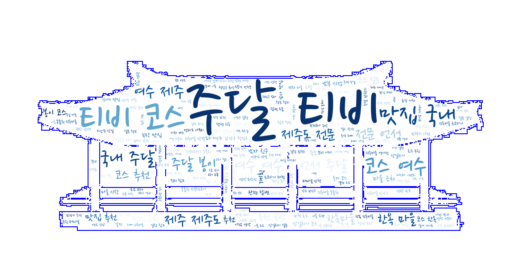

In [158]:
import numpy as np
from PIL import Image
mask = np.array(Image.open('data/korea-house-black-fill.png'))
불용어 = set(['여행'])
wordcloud = WordCloud(
    background_color='white',
    colormap=color_map,
    collocations=True, # 특정단어가 자주 같이 나오면 같이 뿌려 ex황리단같은거는 같이
    max_words=200,
    max_font_size=100,
    scale=2, # 이미지 크기의 비율(다운로드시 달라짐)
    random_state=777,
    font_path = font_path,
    stopwords=불용어,
    mask = mask,
    contour_color='blue',
    contour_width=1
).generate(jj)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [159]:
# 생성된 wordcloud 저장
wordcloud.to_file('data/naver_kin_전주.jpg')

# 6. Word2Vec

In [188]:
df_nouns2 = df_postagged.loc[df_postagged['pos'].isin(['NNP', 'NNG'])]

In [221]:
jj_train_datas = []
gj_train_datas = []
for index in set(df_nouns2["no"].values) :
    jj_train_datas.append(df_nouns2[(df_nouns2["query"]=="전주 여행")&(df_nouns2["no"]==index)]['token'].to_list())
    gj_train_datas.append(df_nouns2[(df_nouns2["query"]=="경주 여행")&(df_nouns2["no"]==index)]['token'].to_list())

In [223]:
from gensim.models import Word2Vec
jj_model = Word2Vec(jj_train_datas, # 학습데이터 2차원
                window=10, # 각 단어의 좌우10개 단어를 학습 컨텐츠로 사용
                min_count=2, # 학습데이터에서 2회 이상 등장한 단어만 학습.
                workers=-1 # 병렬처리 core수. -1: 모든 가용 코어 사용.
                )

In [231]:
jj_model.wv.most_similar('주달')

[('당일', 0.3698463439941406),
 ('시설', 0.2762660086154938),
 ('양식', 0.24960343539714813),
 ('도시', 0.24882428348064423),
 ('남자', 0.21197080612182617),
 ('실시간', 0.21178807318210602),
 ('최고봉', 0.20512956380844116),
 ('렌트', 0.20174548029899597),
 ('가보세요', 0.20067404210567474),
 ('제주', 0.1991206258535385)]

In [232]:
gj_model = Word2Vec(gj_train_datas, # 학습데이터 2차원
                window=10, # 각 단어의 좌우10개 단어를 학습 컨텐츠로 사용
                min_count=2, # 학습데이터에서 2회 이상 등장한 단어만 학습.
                workers=-1 # 병렬처리 core수. -1: 모든 가용 코어 사용.
                ) 

In [235]:
gj_model.wv.most_similar('추석')

[('방학', 0.3082698583602905),
 ('어르신', 0.284964382648468),
 ('월드', 0.2626396715641022),
 ('운영', 0.2577804923057556),
 ('작품', 0.24819181859493256),
 ('양남', 0.24142788350582123),
 ('종합', 0.21409261226654053),
 ('어린애', 0.21190187335014343),
 ('저번', 0.210212841629982),
 ('개화', 0.2067105919122696)]